In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

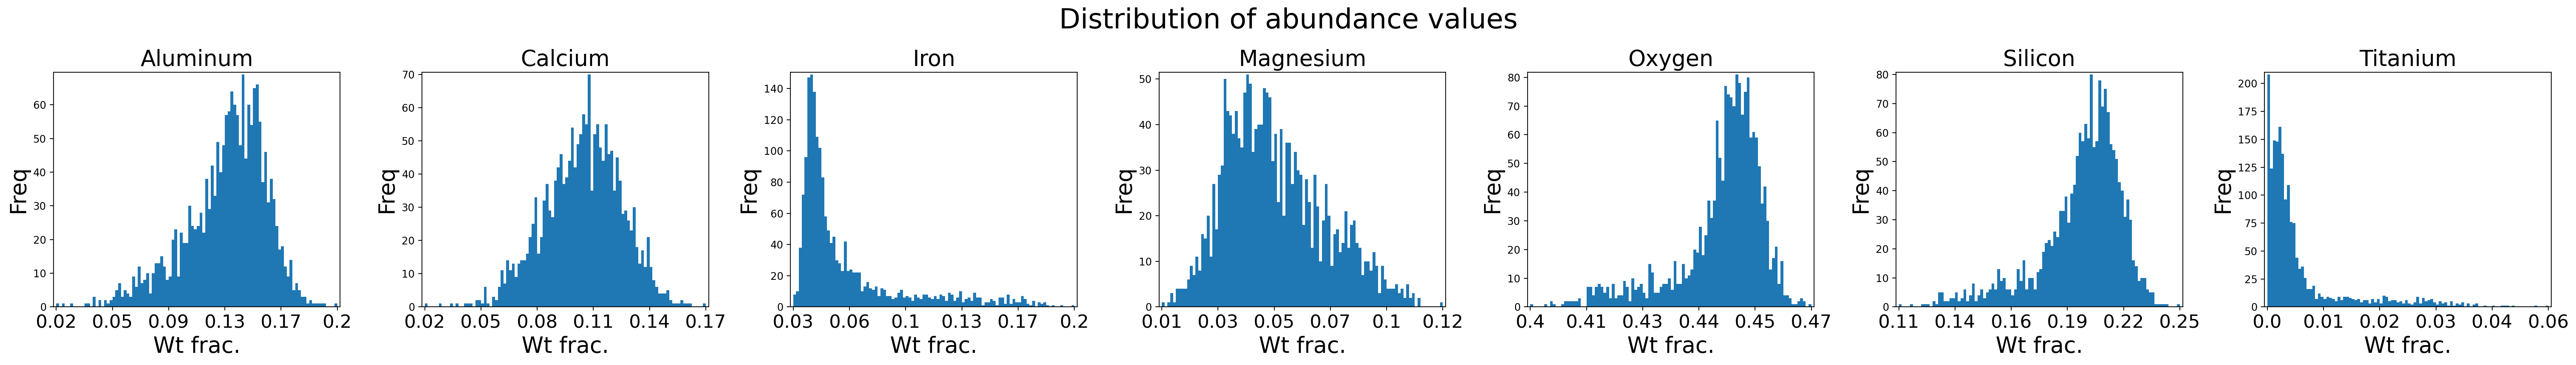

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

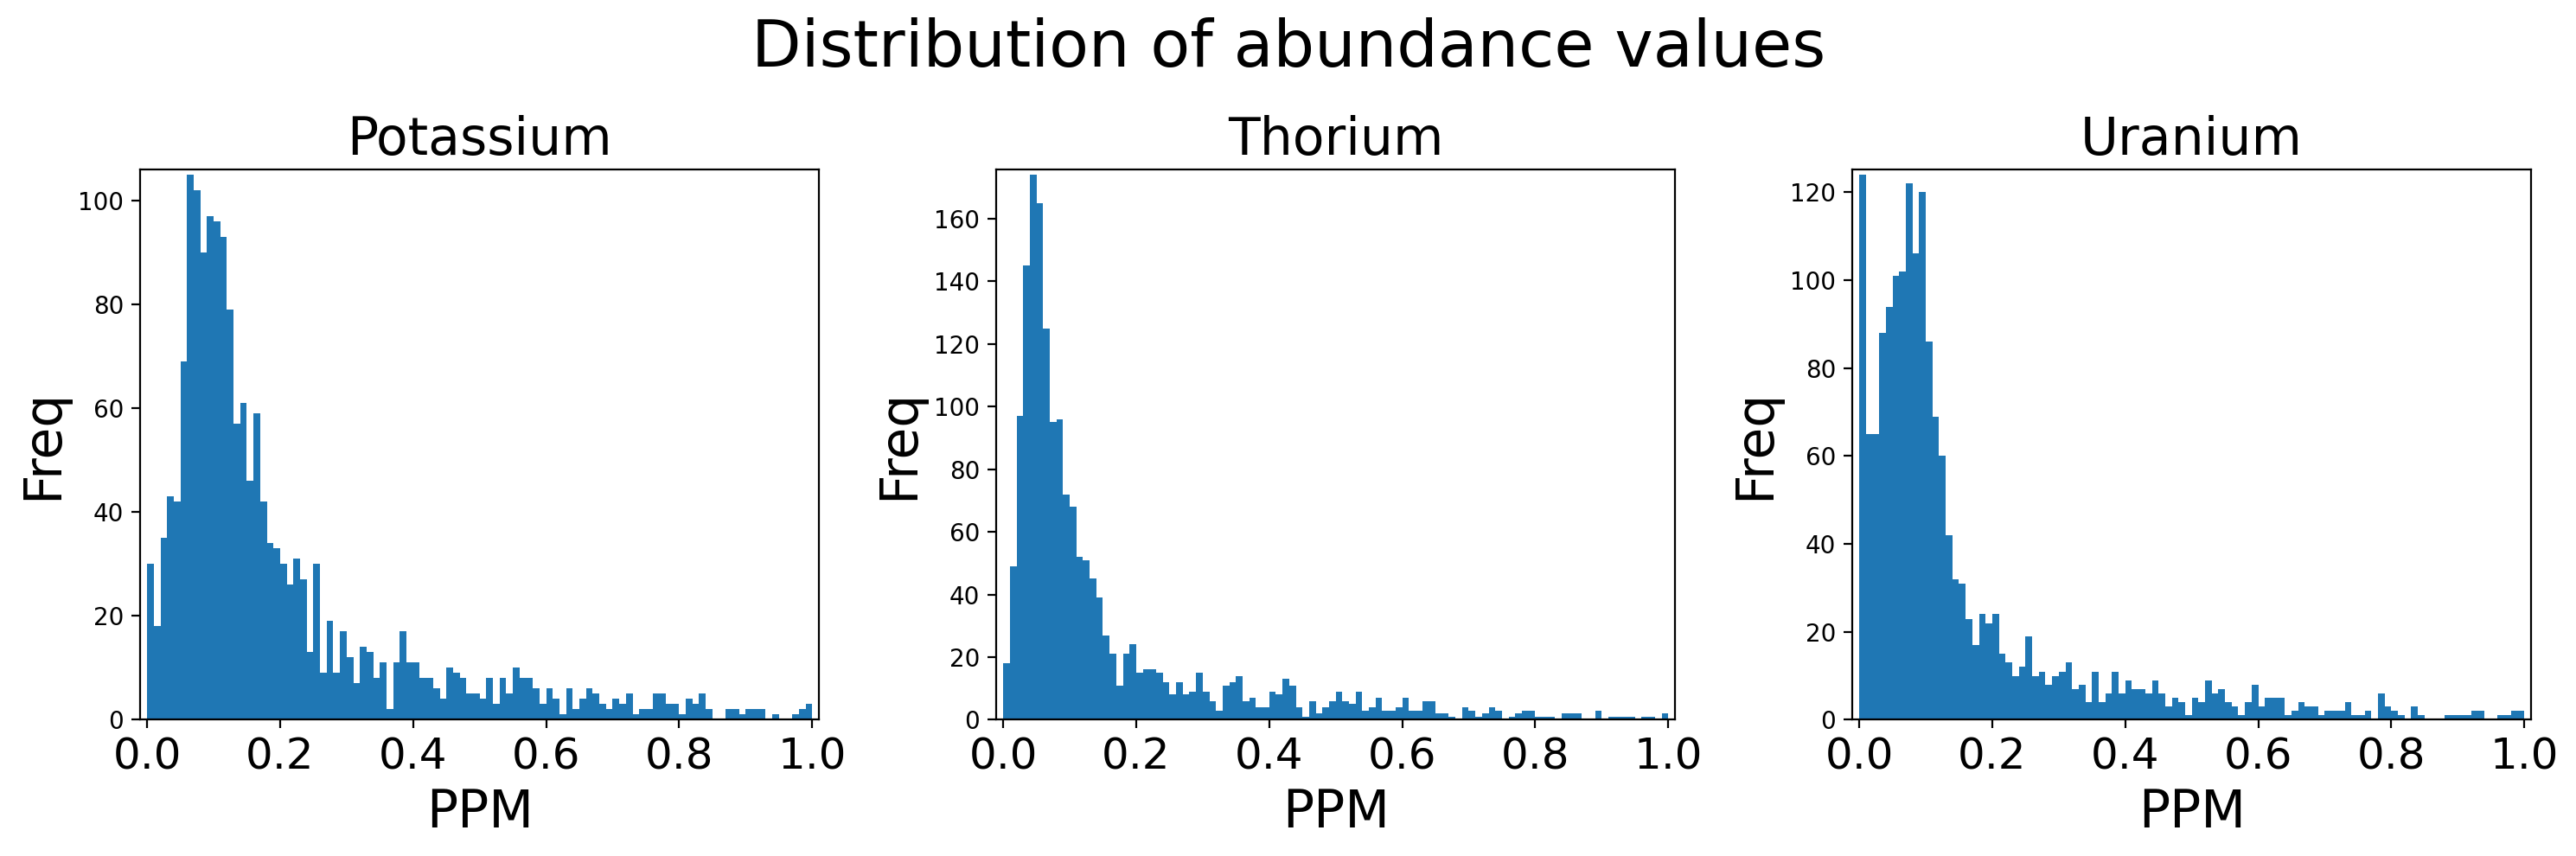

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

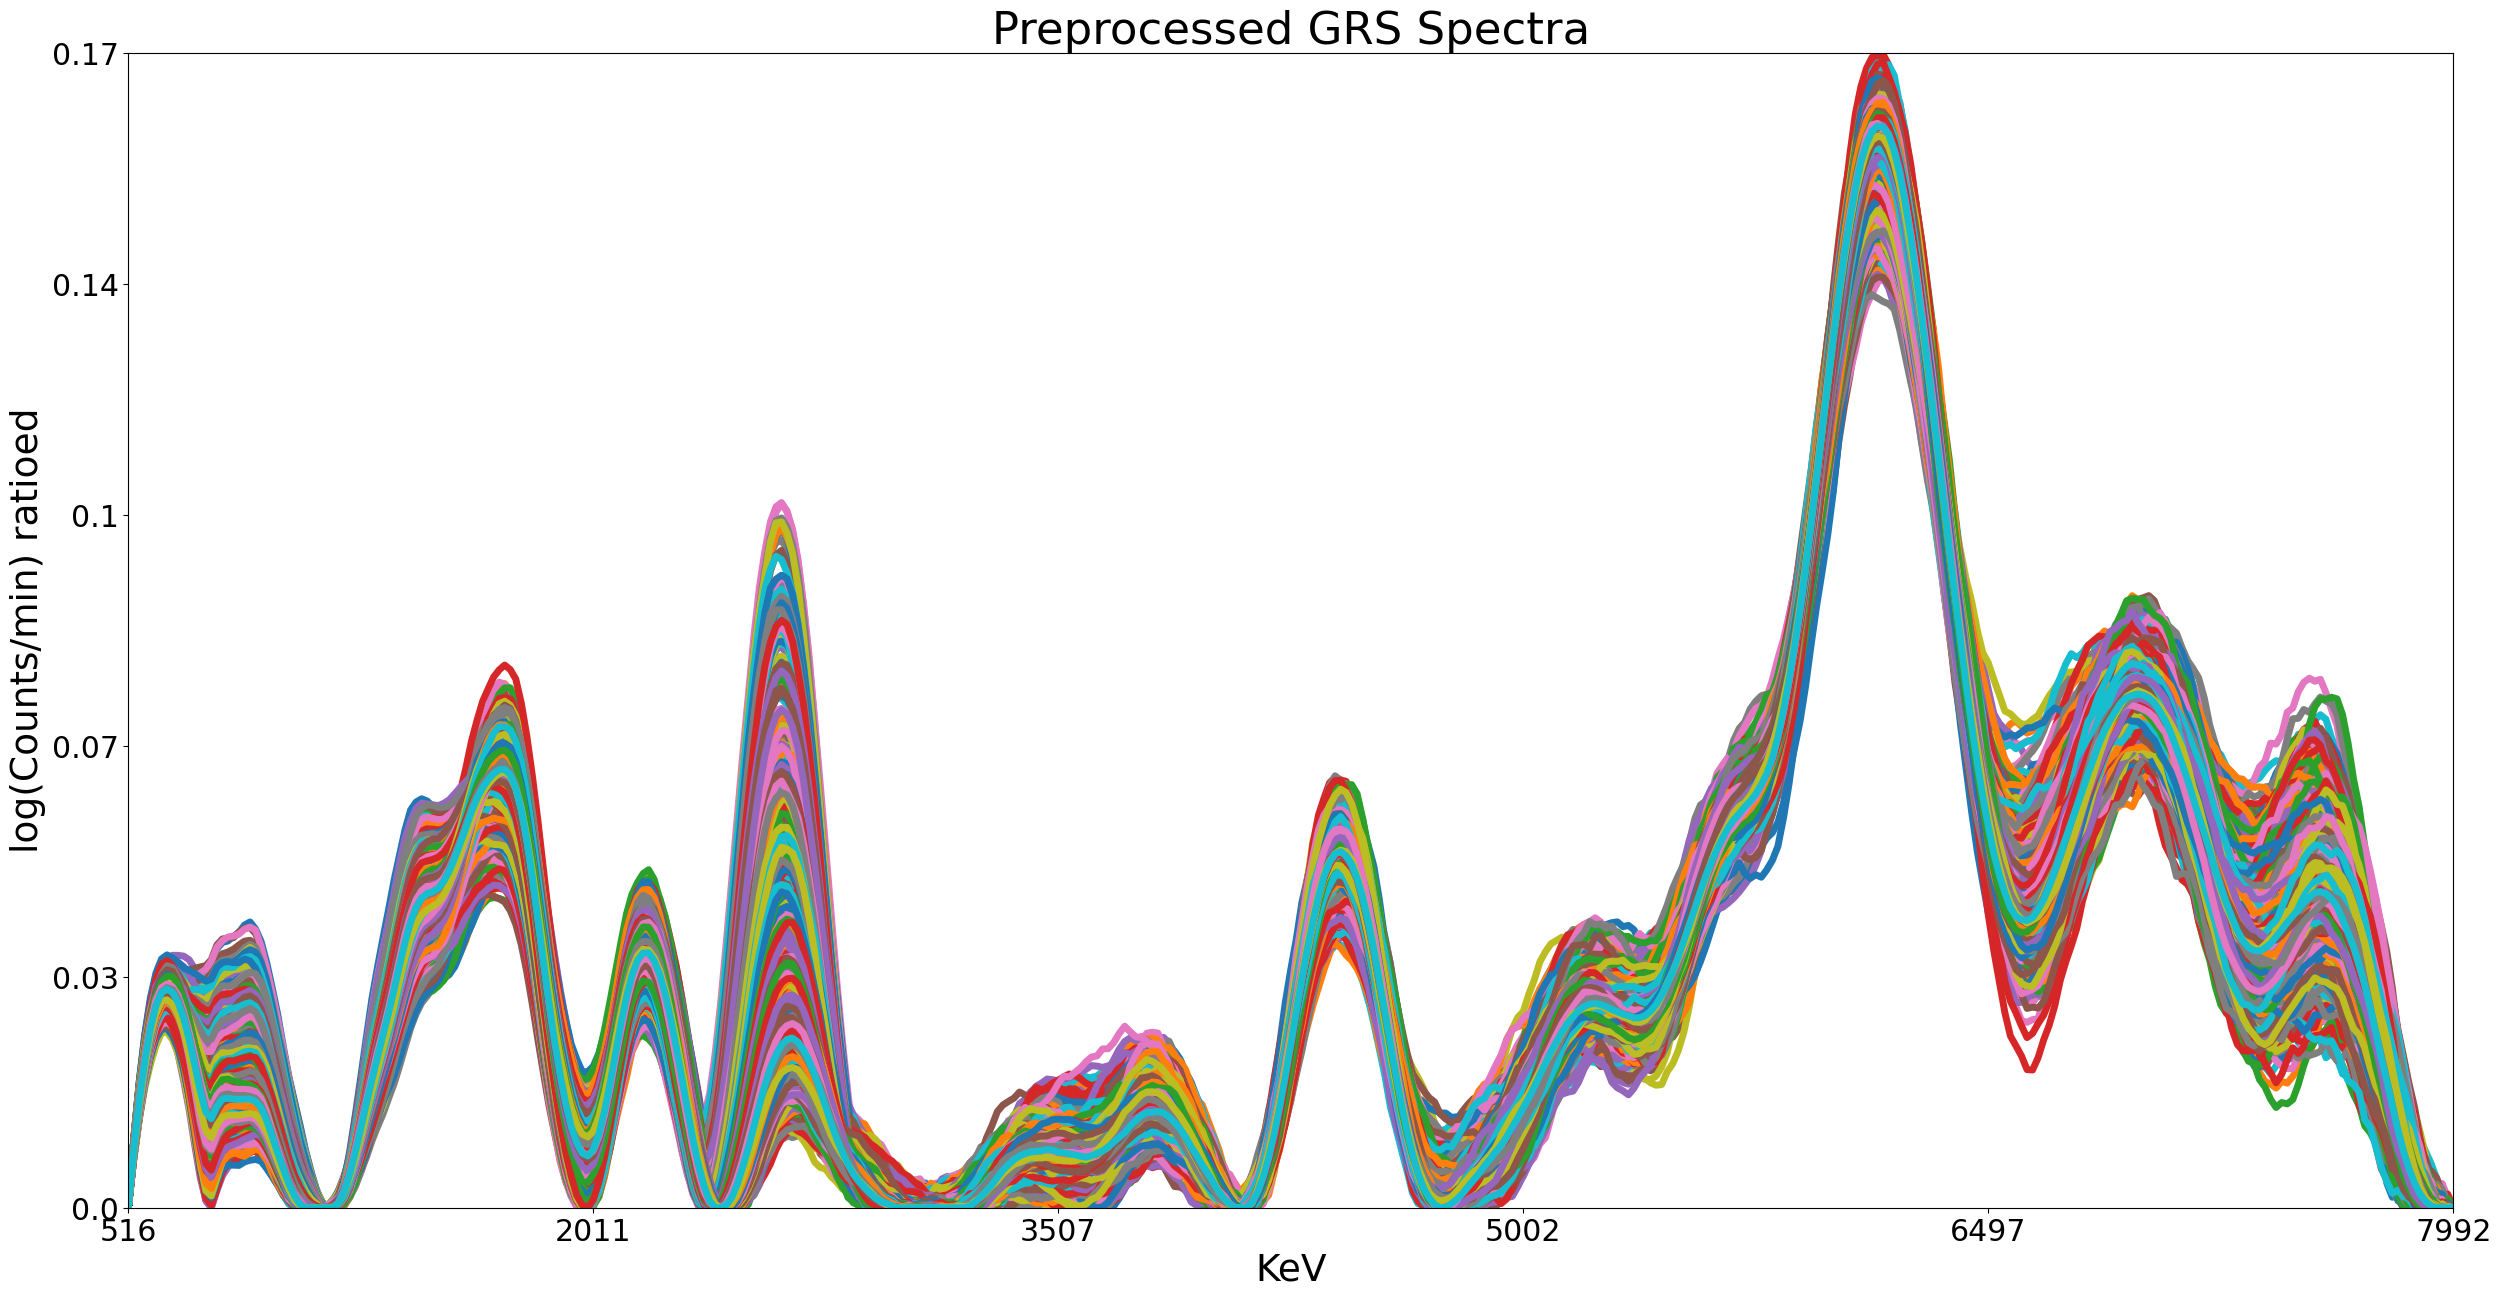

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#load the pre-trained models
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))
    correlation=covariance/(x_std*y_std)
    return correlation

In [27]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [28]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [29]:
#create a NN (Neural Network) graph containing just the input layer
nnGraph=inputLayer

In [30]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, strideactivation function, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,activation,dropoutRate):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    reluActivation=tf.keras.layers.Activation(activation)
    #add the 1st activation layer to the graph
    volume=reluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(0.5,
                                              noise_shape=None,
                                              seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    return volume

In [31]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the activation for each Conv block
activationForEachConvBlock=['relu','relu','relu','relu']
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5,0.5]

In [32]:
#iterate through all the number of channels and add CBAM blocks¶

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nnGraph=createConvolutionalBlock(nnGraph,
                                     noOfChannelsInEachConvBlock[i],
                                     filterSizesForEachConvBlock[i],
                                     strideSizesForEachConvBlock[i],
                                     activationForEachConvBlock[i],
                                     dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nnGraph.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [33]:
#Flatten the features
nnGraph=tf.keras.layers.Flatten()(nnGraph)
print(f"Shape of flattened features {nnGraph.shape}")

Shape of flattened features (None, 10240)


In [34]:
#get the embedding (i.e. abundances) from the generated features
#it consists of two steps
#1. Apply a dense layer with 10 nodes without any activation or bias
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [35]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1,
                             name=name)
    return inputNodes/(sampleWiseSums+1e-10)

In [36]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation='relu')(nnGraph)
nuclearElementStage1=tf.keras.layers.Dense(3,activation='relu')(nnGraph)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,
                                      name="Nuclear_Abundances")+1e-10
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")
print(f"Nuclear element shape {nuclearAbundanceEmbedding.shape}")
print(f"All element shape {fullAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 7)
Nuclear element shape (None, 3)
All element shape (None, 10)


In [37]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
for i in range(fullAbundanceEmbedding.shape[-1]):
    temp=tf.keras.layers.Dense(noOfChannels,activation=None,use_bias=False)(tf.expand_dims(fullAbundanceEmbedding[:,i],-1))
    elementWiseHiddenLayers.append(tf.expand_dims(temp,-1))
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {elementWiseHiddenLayers[-1].shape}")

Shape of the spectra outputed by Aluminum (None, 421, 1)
Shape of the spectra outputed by Calcium (None, 421, 1)
Shape of the spectra outputed by Iron (None, 421, 1)
Shape of the spectra outputed by Magnesium (None, 421, 1)
Shape of the spectra outputed by Oxygen (None, 421, 1)
Shape of the spectra outputed by Silicon (None, 421, 1)
Shape of the spectra outputed by Titanium (None, 421, 1)
Shape of the spectra outputed by Potassium (None, 421, 1)
Shape of the spectra outputed by Thorium (None, 421, 1)
Shape of the spectra outputed by Uranium (None, 421, 1)


In [38]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(tf.keras.layers.Concatenate(axis=-1)(elementWiseHiddenLayers),
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421)


In [39]:
#apply two dense layers to the network
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(linearMixedSpectra)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(nnGraph)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation=None,name="Reconstruced_Spectra")(nnGraph)

In [40]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      nnGraph],
                             name="Joint_Unmxing_Model")

In [41]:
#create the loss function for the embedding, Mean Squared Error
abundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
#set the number of epochs the model is to be trained for
noOfEpochs=1500
#set the batch size
batchSize=32
#define cosine similarity as a metric

In [42]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=[abundanceLossFunction,abundanceLossFunction,recontructedSpectraLoss],
                      loss_weights=[1,0.5,0.1],
                      metrics=[[pearson_correlation],[pearson_correlation],['cosine_similarity']],
                      steps_per_execution=45)

In [43]:
#set the address where the untrained model will be saved
untrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Unmixing_Model.h5"

In [44]:
#save the untrained model
tf.keras.models.save_model(unmixingModel,
                           untrainedModelAddress,
                           overwrite=True)

In [45]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [46]:
#set no. of folds over which the model is to be validated
noOfFolds=5

In [47]:
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [48]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [49]:
#create a list to hold model training history
modelTrainingHistories=[]
#create a list to store the trained models
trainedModels=[]

In [50]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #print the current fold number
    print(f"Starting processing fold {i+1}")
    
    #load the untrained model
    unmixingModel=tf.keras.models.load_model(untrainedModelAddress,
                                                  compile=False)
    
    #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=[abundanceLossFunction,
                                abundanceLossFunction,
                                recontructedSpectraLoss],
                          loss_weights=[1,0.5,0.1],
                          metrics=[[pearson_correlation],
                                   [pearson_correlation],
                                   ['cosine_similarity']],
                          steps_per_execution=45)
    
    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra[trainingIndices,:],
                                                            y=[regularElementalAbundances[trainingIndices,:],
                                                               nuclearElementalAbundances[trainingIndices,:],
                                                               preprocessedSpectra[trainingIndices,:]],
                                                            batch_size=batchSize,
                                                            epochs=noOfEpochs,
                                                            validation_data=(preprocessedSpectra[testingIndices,:],
                                                                             [regularElementalAbundances[testingIndices,:],
                                                                              nuclearElementalAbundances[testingIndices,:],
                                                                              preprocessedSpectra[testingIndices,:]]),
                                                            validation_freq=1)
                                                            
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    
    #set the address where the trained model from the current 
    currentFoldTrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/trained_unmixing_model"+str(i+1)+".h5"
    
    #save the trained model
    trainedModels.append(unmixingModel)
    

Starting processing fold 1
Epoch 1/1500
45/45 [==============================] - 10s 214ms/step - loss: 0.0229 - tf.math.truediv_loss: 0.0220 - tf.__operators__.add_loss: 0.1291 - Reconstruced_Spectra_loss: -0.6363 - tf.math.truediv_pearson_correlation: 0.5391 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.6363 - val_loss: -0.0540 - val_tf.math.truediv_loss: 0.0067 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9567 - val_tf.math.truediv_pearson_correlation: 0.8433 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9567
Epoch 2/1500
45/45 [==============================] - 1s 28ms/step - loss: -0.0630 - tf.math.truediv_loss: 0.0052 - tf.__operators__.add_loss: 0.0603 - Reconstruced_Spectra_loss: -0.9831 - tf.math.truediv_pearson_correlation: 0.8697 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9831 - val_loss: -0.0591 -

45/45 [==============================] - 1s 32ms/step - loss: -0.0682 - tf.math.truediv_loss: 0.0013 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9948 - tf.math.truediv_pearson_correlation: 0.9668 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: -0.0633 - val_tf.math.truediv_loss: 0.0011 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9944 - val_tf.math.truediv_pearson_correlation: 0.9819 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9944
Epoch 15/1500
45/45 [==============================] - 1s 30ms/step - loss: -0.0682 - tf.math.truediv_loss: 0.0013 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9949 - tf.math.truediv_pearson_correlation: 0.9669 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: -0.0636 - val_tf.math.truediv_loss: 9.0386e-04 - 

45/45 [==============================] - 1s 30ms/step - loss: -0.0688 - tf.math.truediv_loss: 7.5319e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9954 - tf.math.truediv_pearson_correlation: 0.9802 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: -0.0641 - val_tf.math.truediv_loss: 4.1080e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.truediv_pearson_correlation: 0.9905 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 28/1500
45/45 [==============================] - 1s 29ms/step - loss: -0.0688 - tf.math.truediv_loss: 7.3588e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9955 - tf.math.truediv_pearson_correlation: 0.9807 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: -0.0642 - val_tf.math.truediv_loss: 3

45/45 [==============================] - 1s 31ms/step - loss: -0.0691 - tf.math.truediv_loss: 5.4018e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9965 - tf.math.truediv_pearson_correlation: 0.9859 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: -0.0644 - val_tf.math.truediv_loss: 2.9990e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.truediv_pearson_correlation: 0.9926 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 41/1500
45/45 [==============================] - 1s 29ms/step - loss: -0.0691 - tf.math.truediv_loss: 5.1223e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9966 - tf.math.truediv_pearson_correlation: 0.9865 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: -0.0644 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 30ms/step - loss: -0.0693 - tf.math.truediv_loss: 4.2071e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9969 - tf.math.truediv_pearson_correlation: 0.9890 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: -0.0645 - val_tf.math.truediv_loss: 2.4825e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.truediv_pearson_correlation: 0.9935 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 54/1500
45/45 [==============================] - 1s 30ms/step - loss: -0.0693 - tf.math.truediv_loss: 4.1154e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9969 - tf.math.truediv_pearson_correlation: 0.9892 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: -0.0645 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 30ms/step - loss: -0.0694 - tf.math.truediv_loss: 3.4597e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9909 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0645 - val_tf.math.truediv_loss: 2.2999e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.truediv_pearson_correlation: 0.9939 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 67/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0694 - tf.math.truediv_loss: 3.5345e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9908 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0645 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 2s 39ms/step - loss: -0.0694 - tf.math.truediv_loss: 3.1068e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9973 - tf.math.truediv_pearson_correlation: 0.9919 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: -0.0645 - val_tf.math.truediv_loss: 2.2054e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.truediv_pearson_correlation: 0.9942 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 80/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0694 - tf.math.truediv_loss: 3.0538e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9973 - tf.math.truediv_pearson_correlation: 0.9920 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: -0.0645 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 2s 34ms/step - loss: -0.0695 - tf.math.truediv_loss: 2.8198e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9926 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0646 - val_tf.math.truediv_loss: 2.1088e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.truediv_pearson_correlation: 0.9945 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 93/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0695 - tf.math.truediv_loss: 2.7847e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9927 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0646 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 2s 34ms/step - loss: -0.0695 - tf.math.truediv_loss: 2.5567e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9977 - tf.math.truediv_pearson_correlation: 0.9933 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: -0.0646 - val_tf.math.truediv_loss: 2.0344e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9979 - val_tf.math.truediv_pearson_correlation: 0.9947 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9979
Epoch 106/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0695 - tf.math.truediv_loss: 2.5621e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9977 - tf.math.truediv_pearson_correlation: 0.9933 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0696 - tf.math.truediv_loss: 2.2828e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9940 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0646 - val_tf.math.truediv_loss: 1.9146e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9950 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 119/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0695 - tf.math.truediv_loss: 2.3169e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9939 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0696 - tf.math.truediv_loss: 2.1805e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9943 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0646 - val_tf.math.truediv_loss: 1.8425e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9952 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 132/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0696 - tf.math.truediv_loss: 2.1404e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9944 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0696 - tf.math.truediv_loss: 2.0064e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9947 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0646 - val_tf.math.truediv_loss: 1.8220e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9953 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 145/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0696 - tf.math.truediv_loss: 2.0330e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9947 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0696 - tf.math.truediv_loss: 1.9256e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9949 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0646 - val_tf.math.truediv_loss: 1.8228e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9980 - val_tf.math.truediv_pearson_correlation: 0.9954 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9980
Epoch 158/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0696 - tf.math.truediv_loss: 1.9209e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9950 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0696 - tf.math.truediv_loss: 1.8173e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.7803e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 171/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0696 - tf.math.truediv_loss: 1.8050e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 30ms/step - loss: -0.0696 - tf.math.truediv_loss: 1.7714e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9953 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.7753e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 184/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0696 - tf.math.truediv_loss: 1.7645e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9954 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0646 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.7148e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.7609e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 197/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.6851e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9956 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 30ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.6661e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9956 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.6570e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9958 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 210/1500
45/45 [==============================] - 1s 30ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.6381e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9957 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.5885e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.6328e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9959 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 223/1500
45/45 [==============================] - 1s 30ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.5848e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 42ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.5476e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.5621e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 236/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.5626e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.4734e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.5015e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 249/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.4950e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.4508e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.4654e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 262/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.4475e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.4272e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.4563e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 275/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.4250e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3924e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.3929e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9964 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 288/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3830e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3833e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.4104e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 301/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3657e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 30ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3481e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.3506e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 314/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3591e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 39ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3561e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.3922e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 327/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3536e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 30ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3311e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.3371e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 340/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3693e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3142e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.3642e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 353/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3111e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2965e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0647 - val_tf.math.truediv_loss: 1.3016e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 366/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.3018e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2993e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.3050e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 379/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2881e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0647 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2839e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2787e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 392/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2954e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2999e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2800e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 405/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2797e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2606e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2965e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 418/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2831e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2497e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2880e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 431/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2681e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2646e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2741e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 444/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2649e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2755e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2580e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 457/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2579e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2474e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2834e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 470/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2568e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2427e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2610e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 483/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2317e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0697 - tf.math.truediv_loss: 1.2450e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2437e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 496/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2435e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2344e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2508e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 509/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2453e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2332e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2381e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 522/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2248e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2256e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2393e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 535/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2203e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2427e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2275e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 548/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2077e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2198e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2204e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 561/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2226e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2235e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2256e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 574/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2226e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2042e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2095e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 587/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1958e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1871e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2239e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 600/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1977e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1965e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2181e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 613/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2043e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1951e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1974e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 626/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2105e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1922e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1961e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 639/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2005e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.2020e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2357e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 652/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1810e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1864e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1983e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 665/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1952e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1780e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1936e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 678/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1781e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1996e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1990e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 691/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1809e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1845e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1872e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 704/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1845e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1656e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1922e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 717/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1778e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1673e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1879e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 730/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1725e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1619e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1830e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 743/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1652e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1621e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1939e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 756/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1434e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1707e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1804e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 769/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1572e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1562e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1708e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 782/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1641e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1507e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.2281e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 795/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1582e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 39ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1572e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1881e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 808/1500
45/45 [==============================] - 2s 41ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1317e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1334e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1650e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 821/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1498e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 40ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1395e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1672e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 834/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1381e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1352e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1749e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 847/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1430e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1420e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1533e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 860/1500
45/45 [==============================] - 2s 47ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1414e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1584e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1642e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 873/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1736e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1465e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1578e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 886/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1352e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1310e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1686e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 899/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1456e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1260e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1382e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 912/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1497e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1321e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1501e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 925/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1211e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1470e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1639e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 938/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1285e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1264e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1489e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 951/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1323e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1136e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1426e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 964/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1133e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1291e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1369e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 977/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1320e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1307e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1360e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 990/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1205e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1152e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1394e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1003/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1197e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss:

Epoch 1015/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0997e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1241e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1016/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1000e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.ma

Epoch 1028/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1229e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1339e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1029/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1075e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1041/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0997e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1202e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1042/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1176e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1054/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1282e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1150e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1055/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1063e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.ma

Epoch 1067/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1041e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1208e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1068/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0980e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1080/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1096e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1116e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1081/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1093e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1093/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0913e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1177e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1094/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1100e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.ma

Epoch 1106/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0911e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1133e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1107/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0971e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1119/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0980e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1465e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1120/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0803e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.ma

Epoch 1132/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0852e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1015e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1133/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0934e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1145/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1095e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1003e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1146/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1023e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.ma

Epoch 1158/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0955e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1327e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1159/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0936e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1171/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1012e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1314e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1172/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0945e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.ma

Epoch 1184/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0994e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1231e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1185/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0784e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1197/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0727e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1008e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1198/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0850e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1210/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1025e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1180e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1211/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1005e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1223/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0926e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1041e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1224/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.1030e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1236/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0780e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0991e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1237/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0897e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1249/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0904e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0951e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1250/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0785e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1262/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0859e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1010e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1263/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0821e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1275/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0817e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0962e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1276/1500
45/45 [==============================] - 2s 41ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0650e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1288/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0720e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0919e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1289/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0781e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1301/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0836e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1211e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1302/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0903e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1314/1500
45/45 [==============================] - 2s 43ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0896e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0966e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1315/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0976e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1327/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0743e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1290e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1328/1500
45/45 [==============================] - 2s 41ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0804e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1340/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0736e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1139e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1341/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0650e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1353/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0646e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1164e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1354/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0813e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1366/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0548e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0964e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1367/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0649e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1379/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0617e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0856e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1380/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0732e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1392/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0695e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0890e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1393/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0803e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1405/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0698e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0845e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1406/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0767e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1418/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0457e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9973 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1017e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1419/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0544e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1431/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0434e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9973 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0824e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1432/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0607e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1444/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0657e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.1081e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1445/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0691e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1457/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0851e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0935e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1458/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0646e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1470/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0658e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0758e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1471/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0675e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1483/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0436e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0794e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1484/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0653e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

Epoch 1496/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0531e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.math.truediv_loss: 1.0842e-04 - val_tf.__operators__.add_loss: 0.0700 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1497/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0698 - tf.math.truediv_loss: 1.0598e-04 - tf.__operators__.add_loss: 0.0600 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0648 - val_tf.ma

45/45 [==============================] - 1s 32ms/step - loss: -0.0663 - tf.math.truediv_loss: 6.9238e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9948 - tf.math.truediv_pearson_correlation: 0.9818 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: -0.0715 - val_tf.math.truediv_loss: 0.0028 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.truediv_pearson_correlation: 0.9589 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 10/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0664 - tf.math.truediv_loss: 6.4229e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9948 - tf.math.truediv_pearson_correlation: 0.9831 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: -0.0720 - val_tf.math.truediv_loss: 0.002

45/45 [==============================] - 1s 33ms/step - loss: -0.0668 - tf.math.truediv_loss: 4.5902e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9968 - tf.math.truediv_pearson_correlation: 0.9880 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: -0.0742 - val_tf.math.truediv_loss: 2.7351e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.truediv_pearson_correlation: 0.9938 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 23/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0668 - tf.math.truediv_loss: 4.4879e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9968 - tf.math.truediv_pearson_correlation: 0.9882 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: -0.0742 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 32ms/step - loss: -0.0669 - tf.math.truediv_loss: 3.6527e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9904 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0743 - val_tf.math.truediv_loss: 2.2407e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.truediv_pearson_correlation: 0.9944 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 36/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0669 - tf.math.truediv_loss: 3.5533e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9907 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0743 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 2s 33ms/step - loss: -0.0670 - tf.math.truediv_loss: 3.1268e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9918 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0743 - val_tf.math.truediv_loss: 2.1117e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.truediv_pearson_correlation: 0.9947 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 49/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0670 - tf.math.truediv_loss: 3.0543e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9920 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0743 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 2s 34ms/step - loss: -0.0670 - tf.math.truediv_loss: 2.7142e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9973 - tf.math.truediv_pearson_correlation: 0.9928 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: -0.0743 - val_tf.math.truediv_loss: 1.8961e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.truediv_pearson_correlation: 0.9952 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 62/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0670 - tf.math.truediv_loss: 2.7237e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9928 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0743 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 33ms/step - loss: -0.0671 - tf.math.truediv_loss: 2.5196e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9975 - tf.math.truediv_pearson_correlation: 0.9934 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.8277e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.truediv_pearson_correlation: 0.9954 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 75/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0671 - tf.math.truediv_loss: 2.4471e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9976 - tf.math.truediv_pearson_correlation: 0.9936 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 36ms/step - loss: -0.0671 - tf.math.truediv_loss: 2.2698e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9977 - tf.math.truediv_pearson_correlation: 0.9940 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.8112e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9980 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9980
Epoch 88/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0671 - tf.math.truediv_loss: 2.2517e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9941 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 44ms/step - loss: -0.0671 - tf.math.truediv_loss: 2.1440e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9944 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.7696e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 101/1500
45/45 [==============================] - 2s 45ms/step - loss: -0.0671 - tf.math.truediv_loss: 2.1374e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9944 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0744 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0672 - tf.math.truediv_loss: 2.0174e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9947 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.7648e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9980 - val_tf.math.truediv_pearson_correlation: 0.9956 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9980
Epoch 114/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.9856e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9948 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0744 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.9044e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9950 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.6908e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9980 - val_tf.math.truediv_pearson_correlation: 0.9958 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9980
Epoch 127/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.9020e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9950 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0744 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.8241e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.7211e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9957 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 140/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.8128e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0744 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.7387e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9954 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.5985e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 153/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.7571e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9954 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0744 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.7138e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0744 - val_tf.math.truediv_loss: 1.5674e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9961 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 166/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.7122e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0744 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.6519e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9956 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.5315e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 179/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.6198e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9957 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.5882e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.4715e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 192/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.5695e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 3s 62ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.5293e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.4653e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 205/1500
45/45 [==============================] - 3s 59ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.5334e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.4882e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.4870e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 218/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.4936e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.4307e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.4283e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 231/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0672 - tf.math.truediv_loss: 1.4842e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.4384e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.4018e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 244/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.4320e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.4094e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.3117e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 257/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.4135e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 38ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3867e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.3136e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 270/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3716e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3861e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.3262e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 283/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3742e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3487e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2621e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 296/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3491e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3497e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2682e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 309/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3661e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3445e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2406e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 322/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3115e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 44ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3147e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2514e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 335/1500
45/45 [==============================] - 2s 50ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3225e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3216e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2565e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 348/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3042e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2924e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2337e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 361/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2920e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2942e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2299e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 374/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.3059e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 43ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2807e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2145e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 387/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2751e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2678e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2081e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 400/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2954e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 41ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2715e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1814e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 413/1500
45/45 [==============================] - 2s 41ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2752e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2713e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2015e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 426/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2666e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2759e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1859e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 439/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2737e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2573e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1735e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 452/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2627e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2406e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1997e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 465/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2595e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2570e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1960e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 478/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2568e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2482e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1826e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 491/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2418e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2609e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1695e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 504/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2419e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2505e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1780e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 517/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2537e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2393e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1690e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 530/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2386e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2479e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1869e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 543/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2327e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2056e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1653e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 556/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2106e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 49ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2124e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1663e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 569/1500
45/45 [==============================] - 2s 44ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2293e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 3s 62ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2332e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1616e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 582/1500
45/45 [==============================] - 2s 51ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2135e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 38ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2297e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1560e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 595/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2075e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1892e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1515e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 608/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2064e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 40ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2112e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1583e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 621/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2024e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2074e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1555e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 634/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1916e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1984e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1867e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 647/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1985e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2192e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.2053e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 660/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1990e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.2082e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1470e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 673/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1882e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1977e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1380e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 686/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1974e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1917e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1492e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 699/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1896e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1776e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1610e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 712/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1834e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1605e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1384e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 725/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1862e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1787e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1377e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 738/1500
45/45 [==============================] - 2s 48ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1832e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1835e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1522e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 751/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1762e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1776e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1395e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 764/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1538e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1739e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1282e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 777/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1743e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1558e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1315e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 790/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1491e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1812e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1563e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 803/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1657e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1619e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1281e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 816/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1592e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1531e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1304e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 829/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1603e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1490e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1201e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 842/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1623e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1445e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1232e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 855/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1679e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1486e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1300e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 868/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1716e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1489e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1274e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 881/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1594e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1474e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1268e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 894/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1658e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1568e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1213e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 907/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1400e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1442e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1126e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 920/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1431e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1469e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1417e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 933/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1568e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1519e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1703e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 946/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1538e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1423e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1233e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 959/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1341e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1342e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1156e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 972/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1348e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1464e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1142e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 985/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1424e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1576e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1130e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 998/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1241e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 

Epoch 1010/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1226e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1034e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1011/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1153e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1023/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1347e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1039e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1024/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1409e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1036/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1297e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1144e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1037/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1283e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1049/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1308e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1050e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1050/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1326e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1062/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1282e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1034e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1063/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1292e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1075/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1111e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1047e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1076/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1408e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1088/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1245e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1011e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1089/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1097e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1101/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1245e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1072e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1102/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1293e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1114/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1175e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0940e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1115/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1211e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1127/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1150e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1089e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1128/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1257e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1140/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1145e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0927e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1141/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1270e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1153/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1092e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1073e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1154/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1294e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1166/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1214e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1018e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1167/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1162e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1179/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1176e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1058e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1180/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1075e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1192/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1098e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1067e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1193/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0973e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1205/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1011e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1019e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1206/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1007e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1218/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0846e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1408e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1219/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1057e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1231/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0954e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1038e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1232/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0984e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1244/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0978e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0857e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1245/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1058e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1257/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0981e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0867e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1258/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0900e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1270/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0999e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0848e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1271/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0914e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1283/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1022e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0761e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1284/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0965e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1296/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1009e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0838e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1297/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0743e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1309/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0943e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0722e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1310/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1027e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1322/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1061e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0963e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1323/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.1048e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1335/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0894e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1027e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1336/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0804e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1348/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0861e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0977e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1349/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0930e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1361/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0902e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0754e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1362/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0993e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1374/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0788e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1140e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1375/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0833e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1387/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0848e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.math.truediv_loss: 1.1026e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1388/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0733e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0745 - val_tf.ma

Epoch 1400/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0846e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0761e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1401/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0832e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1413/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0689e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0669e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1414/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0651e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1426/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0739e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.1088e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1427/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0808e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1439/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0669e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0874e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1440/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0819e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1452/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0710e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0835e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1453/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0988e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1465/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0595e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0827e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1466/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0676e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1478/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0805e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0638e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1479/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0643e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 1491/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0736e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.math.truediv_loss: 1.0887e-04 - val_tf.__operators__.add_loss: 0.0505 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1492/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0673 - tf.math.truediv_loss: 1.0792e-04 - tf.__operators__.add_loss: 0.0649 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0746 - val_tf.ma

Epoch 4/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0675 - tf.math.truediv_loss: 0.0010 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9947 - tf.math.truediv_pearson_correlation: 0.9733 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: -0.0646 - val_tf.math.truediv_loss: 0.0037 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.truediv_pearson_correlation: 0.9183 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 5/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0676 - tf.math.truediv_loss: 9.3956e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9947 - tf.math.truediv_pearson_correlation: 0.9753 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: -0.0648 - val_tf.math.truediv_los

45/45 [==============================] - 1s 32ms/step - loss: -0.0681 - tf.math.truediv_loss: 5.3669e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9961 - tf.math.truediv_pearson_correlation: 0.9859 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: -0.0680 - val_tf.math.truediv_loss: 4.4806e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.truediv_pearson_correlation: 0.9922 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 18/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0681 - tf.math.truediv_loss: 5.2230e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9963 - tf.math.truediv_pearson_correlation: 0.9863 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: -0.0682 - val_tf.math.truediv_loss: 3

45/45 [==============================] - 1s 31ms/step - loss: -0.0683 - tf.math.truediv_loss: 4.0826e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9970 - tf.math.truediv_pearson_correlation: 0.9893 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: -0.0683 - val_tf.math.truediv_loss: 2.4249e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.truediv_pearson_correlation: 0.9943 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 31/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0683 - tf.math.truediv_loss: 3.9853e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9970 - tf.math.truediv_pearson_correlation: 0.9895 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: -0.0683 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 32ms/step - loss: -0.0684 - tf.math.truediv_loss: 3.4868e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9908 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0684 - val_tf.math.truediv_loss: 2.1865e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.truediv_pearson_correlation: 0.9947 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 44/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0684 - tf.math.truediv_loss: 3.3715e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9911 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0684 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 33ms/step - loss: -0.0685 - tf.math.truediv_loss: 2.9826e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9921 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0684 - val_tf.math.truediv_loss: 1.9523e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.truediv_pearson_correlation: 0.9952 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 57/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0685 - tf.math.truediv_loss: 2.9154e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9923 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0684 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 34ms/step - loss: -0.0685 - tf.math.truediv_loss: 2.6829e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9929 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0684 - val_tf.math.truediv_loss: 1.8442e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.truediv_pearson_correlation: 0.9954 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 70/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0685 - tf.math.truediv_loss: 2.6479e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9930 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0684 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 34ms/step - loss: -0.0685 - tf.math.truediv_loss: 2.4483e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9975 - tf.math.truediv_pearson_correlation: 0.9935 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.8059e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 83/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.4100e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9976 - tf.math.truediv_pearson_correlation: 0.9936 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 33ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.2656e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9940 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.7403e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9980 - val_tf.math.truediv_pearson_correlation: 0.9956 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9980
Epoch 96/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.2714e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9940 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 33ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.1558e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9943 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.6817e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9982 - val_tf.math.truediv_pearson_correlation: 0.9958 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9982
Epoch 109/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.1435e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9943 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.0307e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9946 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.6501e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9959 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 122/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.0286e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9946 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.9637e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9948 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.6100e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 135/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.9329e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9949 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.8467e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9951 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.6517e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9982 - val_tf.math.truediv_pearson_correlation: 0.9959 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9982
Epoch 148/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.8121e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.7744e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9953 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.6120e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 161/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.7812e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9953 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.6934e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.5642e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9961 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 174/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.6979e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.6484e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9957 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.5584e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 187/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.6227e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9957 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.5988e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.5224e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 200/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.5966e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.5642e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.4820e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9964 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 213/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.5182e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0685 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.5187e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0685 - val_tf.math.truediv_loss: 1.4524e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9964 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 226/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4827e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4608e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.4465e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9964 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 239/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4682e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4446e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.3798e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 252/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4206e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4092e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.3257e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 265/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4172e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.4012e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.3480e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 278/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3877e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3770e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.3201e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 291/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3796e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3492e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.3281e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 304/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3630e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3320e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2722e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 317/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3597e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3403e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2752e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 330/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3261e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3216e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2653e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 343/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3223e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3165e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2499e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 356/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3038e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3034e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2522e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 369/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3031e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2984e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2283e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 382/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2893e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2855e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2540e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 395/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2896e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2847e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2185e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 408/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2867e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2828e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2325e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 421/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2807e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2756e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2062e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 434/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2673e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2551e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2119e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 447/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2535e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2657e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1988e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 460/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2496e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2467e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.2009e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 473/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2449e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2476e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1955e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 486/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2317e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2484e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1814e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 499/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2367e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2399e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1916e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 512/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2209e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2255e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1809e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 525/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2452e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2185e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1780e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 538/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2528e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2276e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1718e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 551/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2265e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2253e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1791e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 564/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2173e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2152e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1766e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 577/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2162e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2043e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1619e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 590/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2278e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1920e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1694e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 603/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2026e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2142e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1602e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 616/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2016e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2266e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1621e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 629/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1934e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1928e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1621e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 642/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2057e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2105e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1536e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 655/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1935e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2028e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1530e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 668/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1936e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1999e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1502e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 681/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1981e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1760e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1428e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 694/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2096e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1865e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1430e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 707/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1791e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1834e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1449e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 720/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1767e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1700e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1402e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 733/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1697e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1787e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1444e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 746/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1723e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1697e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1334e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 759/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1795e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1716e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1399e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 772/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1571e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1815e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1386e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 785/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1784e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1747e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1300e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 798/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1539e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1614e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1368e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 811/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1722e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1796e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1228e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 824/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1624e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1748e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1196e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 837/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1463e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1553e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1167e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 850/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1654e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1724e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1156e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 863/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1595e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1506e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1206e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 876/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1488e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1534e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1195e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 889/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1431e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1462e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1201e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 902/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1292e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 47ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1507e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1055e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 915/1500
45/45 [==============================] - 2s 48ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1364e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 49ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1428e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1232e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 928/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1371e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1409e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1137e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 941/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1526e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1317e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1175e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 954/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1459e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1213e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0959e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 967/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1270e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1330e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1077e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 980/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1465e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1453e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0952e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 993/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1386e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 

Epoch 1005/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1460e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1197e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1006/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1289e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1018/1500
45/45 [==============================] - 2s 42ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1409e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1177e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1019/1500
45/45 [==============================] - 2s 48ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1230e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1031/1500
45/45 [==============================] - 2s 52ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1373e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0904e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1032/1500
45/45 [==============================] - 2s 52ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1205e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1044/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1265e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1055e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1045/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1277e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1057/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1180e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1135e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1058/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1219e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1070/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1221e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1006e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1071/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1316e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1083/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1399e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1118e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1084/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1186e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1096/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1236e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0893e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1097/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1174e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1109/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1218e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0867e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1110/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1188e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1122/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1201e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0855e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1123/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1023e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1135/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1086e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0874e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1136/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1109e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1148/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1267e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0818e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1149/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1320e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1161/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1285e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1057e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1162/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1131e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1174/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0881e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0832e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1175/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1135e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1187/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1168e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0826e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1188/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1007e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1200/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1081e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0857e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1201/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1117e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1213/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1242e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0891e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1214/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0991e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1226/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0984e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0766e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1227/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1047e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1239/1500
45/45 [==============================] - 2s 45ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1070e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.1164e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1240/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1041e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1252/1500
45/45 [==============================] - 2s 49ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0869e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0768e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1253/1500
45/45 [==============================] - 2s 42ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1016e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1265/1500
45/45 [==============================] - 2s 43ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1006e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0740e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1266/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1050e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1278/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0979e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0794e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1279/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0876e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1291/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0924e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0964e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1292/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1047e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1304/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0937e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0818e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1305/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0899e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1317/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0850e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0745e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1318/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0911e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1330/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0899e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0756e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1331/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0785e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1343/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0963e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0681e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1344/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0959e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1356/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0915e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0795e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1357/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0818e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1369/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0931e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0696e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1370/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.1048e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1382/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0888e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0793e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1383/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0921e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1395/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0739e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0846e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1396/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0887e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0686 - val_tf.ma

Epoch 1408/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0900e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0771e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1409/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0830e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1421/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0804e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0748e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1422/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0616e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1434/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0680e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0650e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1435/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0811e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1447/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0893e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0956e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1448/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0856e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1460/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0845e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0793e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1461/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0787e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1473/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0595e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0728e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1474/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0767e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1486/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0905e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0720e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1487/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0786e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

Epoch 1499/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0849e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.math.truediv_loss: 1.0641e-04 - val_tf.__operators__.add_loss: 0.0623 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1500/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.0789e-04 - tf.__operators__.add_loss: 0.0619 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0686 - val_tf.ma

45/45 [==============================] - 2s 34ms/step - loss: -0.0680 - tf.math.truediv_loss: 6.2360e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9950 - tf.math.truediv_pearson_correlation: 0.9836 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: -0.0669 - val_tf.math.truediv_loss: 0.0011 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.truediv_pearson_correlation: 0.9848 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 13/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0680 - tf.math.truediv_loss: 5.9221e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9951 - tf.math.truediv_pearson_correlation: 0.9844 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: -0.0671 - val_tf.math.truediv_loss: 8.949

45/45 [==============================] - 2s 34ms/step - loss: -0.0684 - tf.math.truediv_loss: 4.1383e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9968 - tf.math.truediv_pearson_correlation: 0.9891 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: -0.0680 - val_tf.math.truediv_loss: 2.2806e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.truediv_pearson_correlation: 0.9946 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 26/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0684 - tf.math.truediv_loss: 4.2655e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9968 - tf.math.truediv_pearson_correlation: 0.9888 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: -0.0681 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 2s 35ms/step - loss: -0.0685 - tf.math.truediv_loss: 3.4899e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9908 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0681 - val_tf.math.truediv_loss: 1.9646e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.truediv_pearson_correlation: 0.9951 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 39/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0685 - tf.math.truediv_loss: 3.4541e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9909 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0681 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 35ms/step - loss: -0.0685 - tf.math.truediv_loss: 3.0630e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9920 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0681 - val_tf.math.truediv_loss: 1.8412e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.truediv_pearson_correlation: 0.9953 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 52/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0685 - tf.math.truediv_loss: 2.9831e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9922 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0681 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 35ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.7622e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9928 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0681 - val_tf.math.truediv_loss: 1.7736e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 65/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.7319e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9928 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 35ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.4706e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9976 - tf.math.truediv_pearson_correlation: 0.9935 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.5894e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9979 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9979
Epoch 78/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0686 - tf.math.truediv_loss: 2.5195e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9976 - tf.math.truediv_pearson_correlation: 0.9934 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 37ms/step - loss: -0.0687 - tf.math.truediv_loss: 2.3412e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9938 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.5872e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 91/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0687 - tf.math.truediv_loss: 2.2935e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9940 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 2.1406e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9944 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.6031e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 104/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0687 - tf.math.truediv_loss: 2.1360e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9944 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 2.0097e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9947 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.5317e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 117/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 2.0017e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9947 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.9213e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9949 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.5421e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9982 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9982
Epoch 130/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.9330e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9949 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 44ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.8670e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9951 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.4751e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 143/1500
45/45 [==============================] - 2s 45ms/step - loss: -0.0687 - tf.math.truediv_loss: 1.8610e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9951 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.7638e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9954 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.5209e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9963 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 156/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.7553e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9954 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.7211e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0682 - val_tf.math.truediv_loss: 1.4555e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9964 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 169/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.6759e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9956 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.6528e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9956 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.4407e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 182/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.6552e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9956 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.5803e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.4025e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 195/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.5808e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0682 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 43ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.5497e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.3504e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 208/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.5375e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4957e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.3833e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 221/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.5103e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4748e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.3590e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9966 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 234/1500
45/45 [==============================] - 2s 44ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4618e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4414e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.3532e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 247/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4425e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 41ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4264e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2931e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 260/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4481e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.4024e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2891e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 273/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3911e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3729e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2830e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 286/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3748e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3816e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2563e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 299/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3538e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3783e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2998e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 312/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3802e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3274e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2302e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 325/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3308e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3376e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2186e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 338/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3369e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3039e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2274e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 351/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3063e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3123e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2188e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 364/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.3127e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2999e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1990e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 377/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 1.2931e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2818e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2222e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 390/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2925e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2998e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2019e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 403/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2998e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2947e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2138e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 416/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2908e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2800e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1777e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 429/1500
45/45 [==============================] - 2s 41ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2951e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 41ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2846e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1976e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 442/1500
45/45 [==============================] - 2s 43ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2807e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2594e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2356e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 455/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2847e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2652e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.2299e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 468/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2723e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 42ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2392e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1654e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 481/1500
45/45 [==============================] - 2s 42ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2497e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 44ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2617e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1763e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 494/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2711e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2629e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1795e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 507/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2536e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2285e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1730e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 520/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2534e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 38ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2593e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1571e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 533/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2282e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2500e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1557e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 546/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2261e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2428e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1605e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 559/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2143e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2232e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1512e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 572/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2431e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2508e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1346e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 585/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2238e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2135e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1396e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 598/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2040e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2205e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1685e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 611/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2291e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 31ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2015e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1421e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 624/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1999e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2181e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1462e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 637/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2166e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1948e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1378e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 650/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1814e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2063e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1554e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 663/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1953e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2100e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1676e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 676/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1841e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1900e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1215e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 689/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.2003e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1836e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1553e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 702/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1830e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1814e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1459e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 715/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1844e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1810e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1187e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 728/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1868e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1899e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1229e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 741/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1665e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1857e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1159e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 754/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1586e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 3s 57ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1959e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1257e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 767/1500
45/45 [==============================] - 2s 47ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1595e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1629e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1204e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 780/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1882e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1671e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1305e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 793/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1651e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1684e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0972e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 806/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1642e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 36ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1637e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1058e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 819/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1686e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 37ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1646e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1043e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 832/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1697e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 49ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1570e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1214e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 845/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1529e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 43ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1661e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1477e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 858/1500
45/45 [==============================] - 2s 47ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1528e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1676e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1040e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 871/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1632e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1633e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0950e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 884/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1676e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1400e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1843e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 897/1500
45/45 [==============================] - 2s 37ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1458e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1451e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1027e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 910/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1519e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1581e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1024e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 923/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1581e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1602e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1077e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 936/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1332e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1473e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1069e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 949/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1388e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1358e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1243e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 962/1500
45/45 [==============================] - 2s 42ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1372e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1555e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0943e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 975/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1422e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1395e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0959e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 988/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1520e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 50ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1314e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1210e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1001/1500
45/45 [==============================] - 2s 49ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1361e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss:

Epoch 1013/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1164e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0968e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1014/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1387e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1026/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1282e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1151e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1027/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1308e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1039/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1338e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0994e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1040/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1250e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1052/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1267e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1730e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1053/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1214e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1065/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1296e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0947e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1066/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1263e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1078/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1354e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0917e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1079/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1244e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1091/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1237e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1133e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1092/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1346e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1104/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1380e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1451e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1105/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1402e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1117/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1258e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0751e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1118/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1154e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1130/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1048e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0940e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1131/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1056e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1143/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1152e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0891e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1144/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1221e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1156/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1163e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0807e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1157/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1080e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1169/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0840e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0823e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1170/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1136e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1182/1500
45/45 [==============================] - 2s 38ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1093e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0778e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1183/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1197e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1195/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1020e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0846e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1196/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1100e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1208/1500
45/45 [==============================] - 2s 39ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1123e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1123e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1209/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1183e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1221/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0927e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1390e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1222/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1047e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1234/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0995e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0943e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1235/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1051e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1247/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1170e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1080e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1248/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0951e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1260/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0908e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0716e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1261/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1001e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1273/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0968e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0694e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1274/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0931e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1286/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1001e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1091e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1287/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0985e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1299/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1067e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0788e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1300/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1020e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1312/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0862e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0806e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1313/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0973e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1325/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0970e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0648e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1326/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0884e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

Epoch 1338/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1020e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0905e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1339/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0923e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1351/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0952e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0866e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1352/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0960e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1364/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0967e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0900e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1365/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.1006e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1377/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0953e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0873e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1378/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0923e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1390/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0911e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0782e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1391/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0735e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1403/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0834e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0960e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1404/1500
45/45 [==============================] - 2s 40ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0885e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1416/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0889e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0732e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1417/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0957e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1429/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0690e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0661e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1430/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0815e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1442/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0830e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0703e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1443/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0912e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1455/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0742e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.1286e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1456/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0824e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1468/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0615e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0693e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1469/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0891e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1481/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0810e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0668e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1482/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0575e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.ma

Epoch 1494/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0711e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0683 - val_tf.math.truediv_loss: 1.0692e-04 - val_tf.__operators__.add_loss: 0.0629 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1495/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.0866e-04 - tf.__operators__.add_loss: 0.0618 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0683 - val_tf.ma

45/45 [==============================] - 1s 33ms/step - loss: -0.0680 - tf.math.truediv_loss: 7.7758e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9948 - tf.math.truediv_pearson_correlation: 0.9795 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: -0.0637 - val_tf.math.truediv_loss: 0.0036 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9943 - val_tf.math.truediv_pearson_correlation: 0.9306 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9943
Epoch 8/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0680 - tf.math.truediv_loss: 7.5384e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9948 - tf.math.truediv_pearson_correlation: 0.9802 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: -0.0641 - val_tf.math.truediv_loss: 0.0031

45/45 [==============================] - 1s 33ms/step - loss: -0.0685 - tf.math.truediv_loss: 4.9324e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9966 - tf.math.truediv_pearson_correlation: 0.9870 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: -0.0671 - val_tf.math.truediv_loss: 3.3194e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.truediv_pearson_correlation: 0.9929 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 21/1500
45/45 [==============================] - 1s 31ms/step - loss: -0.0685 - tf.math.truediv_loss: 4.6167e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9967 - tf.math.truediv_pearson_correlation: 0.9879 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: -0.0672 - val_tf.math.truediv_loss: 3

45/45 [==============================] - 1s 33ms/step - loss: -0.0686 - tf.math.truediv_loss: 3.8000e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9970 - tf.math.truediv_pearson_correlation: 0.9900 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: -0.0673 - val_tf.math.truediv_loss: 2.3513e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.truediv_pearson_correlation: 0.9942 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 34/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0686 - tf.math.truediv_loss: 3.6973e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9971 - tf.math.truediv_pearson_correlation: 0.9903 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: -0.0673 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 3.1533e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9917 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0673 - val_tf.math.truediv_loss: 2.0796e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.truediv_pearson_correlation: 0.9948 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 47/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0687 - tf.math.truediv_loss: 3.1534e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9972 - tf.math.truediv_pearson_correlation: 0.9917 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: -0.0673 - val_tf.math.truediv_loss: 2

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 2.8122e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9926 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1.8909e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.truediv_pearson_correlation: 0.9952 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 60/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0688 - tf.math.truediv_loss: 2.7676e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9974 - tf.math.truediv_pearson_correlation: 0.9927 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 2.4860e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9975 - tf.math.truediv_pearson_correlation: 0.9935 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1.8306e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.truediv_pearson_correlation: 0.9954 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 73/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 2.4979e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9975 - tf.math.truediv_pearson_correlation: 0.9934 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 33ms/step - loss: -0.0688 - tf.math.truediv_loss: 2.2959e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9977 - tf.math.truediv_pearson_correlation: 0.9940 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1.7975e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.truediv_pearson_correlation: 0.9955 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 86/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0688 - tf.math.truediv_loss: 2.3133e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9978 - tf.math.truediv_pearson_correlation: 0.9939 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 2.1584e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9943 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1.7265e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9979 - val_tf.math.truediv_pearson_correlation: 0.9957 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9979
Epoch 99/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 2.1510e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9979 - tf.math.truediv_pearson_correlation: 0.9943 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9979 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1

45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 2.0486e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9946 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0674 - val_tf.math.truediv_loss: 1.7171e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9981 - val_tf.math.truediv_pearson_correlation: 0.9958 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9981
Epoch 112/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 2.0455e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9980 - tf.math.truediv_pearson_correlation: 0.9946 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9980 - val_loss: -0.0674 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.9397e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9949 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.6979e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9982 - val_tf.math.truediv_pearson_correlation: 0.9958 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9982
Epoch 125/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.9808e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9981 - tf.math.truediv_pearson_correlation: 0.9948 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9981 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.8272e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.7110e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9982 - val_tf.math.truediv_pearson_correlation: 0.9958 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9982
Epoch 138/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.8247e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9952 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.7689e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9953 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.6505e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 151/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.7499e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9954 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.6889e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.5879e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9961 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 164/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0689 - tf.math.truediv_loss: 1.7179e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9982 - tf.math.truediv_pearson_correlation: 0.9955 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9982 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.6410e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9957 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.5507e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 177/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.6472e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9957 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.5989e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9958 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.6047e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9960 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 190/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.5746e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.5519e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.5145e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9983 - val_tf.math.truediv_pearson_correlation: 0.9962 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9983
Epoch 203/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.5500e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9983 - tf.math.truediv_pearson_correlation: 0.9959 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9983 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4995e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9960 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.4281e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 216/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4757e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4941e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.3962e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9984 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9984
Epoch 229/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4805e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9961 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4533e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9984 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9984 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.3841e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 242/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4332e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4067e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.4311e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9965 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 255/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4298e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9962 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.4003e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.3597e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 268/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3929e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9963 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3773e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9985 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9985 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.3252e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9985 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9985
Epoch 281/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3750e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3642e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.3310e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9967 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 294/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3622e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3528e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0675 - val_tf.math.truediv_loss: 1.3101e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9986 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9986
Epoch 307/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3601e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9964 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3424e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2829e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 320/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3225e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0675 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3154e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2786e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 333/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3212e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2938e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9986 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9986 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2608e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 346/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3054e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3034e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2435e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 359/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.3301e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9965 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2991e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2512e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 372/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2986e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2844e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2367e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 385/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2941e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2676e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2314e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 398/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2982e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2784e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2491e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9968 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 411/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2868e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9966 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2697e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2401e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 424/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2689e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2600e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2263e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9987 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9987
Epoch 437/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2573e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2687e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9987 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9987 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2435e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 450/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2547e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2398e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2249e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 463/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2519e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2526e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2247e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9969 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 476/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2427e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2324e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2141e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 489/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2484e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2420e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1986e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 502/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0690 - tf.math.truediv_loss: 1.2562e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2180e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2014e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 515/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2344e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9967 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2265e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1960e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 528/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2182e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2209e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.2058e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 541/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2267e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2183e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1940e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 554/1500
45/45 [==============================] - 2s 36ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2195e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2252e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1942e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 567/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2039e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2044e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1986e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 580/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2066e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2223e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1869e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 593/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1950e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2083e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1904e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 606/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2051e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2067e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1844e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 619/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2044e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1992e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1820e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 632/1500
45/45 [==============================] - 2s 35ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1987e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1916e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1869e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 645/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1878e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1876e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1933e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 658/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1943e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.2095e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1768e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 671/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1905e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1969e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1793e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 684/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1973e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1895e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1751e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 697/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1835e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1779e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1748e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 710/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1865e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1646e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1846e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 723/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1927e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1970e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9968 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1781e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 736/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1786e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1808e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1620e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 749/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1840e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1688e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1840e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9970 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 762/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1655e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 35ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1724e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1568e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 775/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1658e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1579e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1645e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 788/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1642e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1709e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1580e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 801/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1463e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1624e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1553e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 814/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1684e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1679e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1630e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 827/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1756e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1713e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1558e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 840/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1500e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1596e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1498e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 853/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1650e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1599e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9969 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1513e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 866/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1558e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1471e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1560e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 879/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1468e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1462e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1468e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 892/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1425e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1452e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1448e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 905/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1411e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1530e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1714e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 918/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1527e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1532e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1501e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 931/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1330e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1416e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1721e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 944/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1393e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1203e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1734e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 957/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1356e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1471e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1396e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 970/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1350e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9988 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9988 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1489e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1408e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 983/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1233e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1251e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1479e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 996/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1304e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 

Epoch 1008/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1273e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1346e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1009/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1328e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1021/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1266e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1447e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1022/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1203e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1034/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1296e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1391e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1035/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1302e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1047/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1160e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1417e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1048/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1312e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1060/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1266e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1316e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1061/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1342e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1073/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1288e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1526e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1074/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1218e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1086/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1118e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1336e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1087/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1141e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1099/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1277e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1268e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1100/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1032e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1112/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1177e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1667e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1113/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1115e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1125/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1301e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1355e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1126/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1146e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1138/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1162e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1474e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1139/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1235e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1151/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1223e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1261e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1152/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0989e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1164/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1221e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9970 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1427e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1165/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1145e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1177/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1039e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1195e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1178/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1102e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1190/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1079e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1400e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1191/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0983e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1203/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1071e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1271e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1204/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0846e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1216/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0938e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1325e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1217/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0880e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1229/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1025e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1274e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1230/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1023e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1242/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0948e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1185e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1243/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1040e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1255/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0987e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1194e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1256/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1051e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1268/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1095e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1258e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1269/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0997e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1281/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0987e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1234e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1282/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0771e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1294/1500
45/45 [==============================] - 2s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0996e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1345e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1295/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0951e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1307/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1012e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1412e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1308/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0977e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1320/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1078e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1446e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1321/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0901e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1333/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0978e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1172e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1334/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0827e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1346/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0824e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1076e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1347/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0997e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1359/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.1134e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1154e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1360/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0831e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1372/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0845e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1174e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1373/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0645e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1385/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0846e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1173e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1386/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0826e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1398/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0845e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1077e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1399/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0750e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1411/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0896e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1283e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1412/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0940e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1424/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0771e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1013e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1425/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0728e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1437/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0711e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1125e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1438/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0778e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1450/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0742e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.0998e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9973 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1451/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0738e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1463/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0825e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1498e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1464/1500
45/45 [==============================] - 1s 32ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0732e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1476/1500
45/45 [==============================] - 2s 34ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0951e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1213e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9989 - val_tf.math.truediv_pearson_correlation: 0.9972 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9989
Epoch 1477/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0808e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

Epoch 1489/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0642e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9972 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.math.truediv_loss: 1.1602e-04 - val_tf.__operators__.add_loss: 0.0644 - val_Reconstruced_Spectra_loss: -0.9988 - val_tf.math.truediv_pearson_correlation: 0.9971 - val_tf.__operators__.add_pearson_correlation: nan - val_Reconstruced_Spectra_cosine_similarity: 0.9988
Epoch 1490/1500
45/45 [==============================] - 1s 33ms/step - loss: -0.0691 - tf.math.truediv_loss: 1.0880e-04 - tf.__operators__.add_loss: 0.0614 - Reconstruced_Spectra_loss: -0.9989 - tf.math.truediv_pearson_correlation: 0.9971 - tf.__operators__.add_pearson_correlation: nan - Reconstruced_Spectra_cosine_similarity: 0.9989 - val_loss: -0.0676 - val_tf.ma

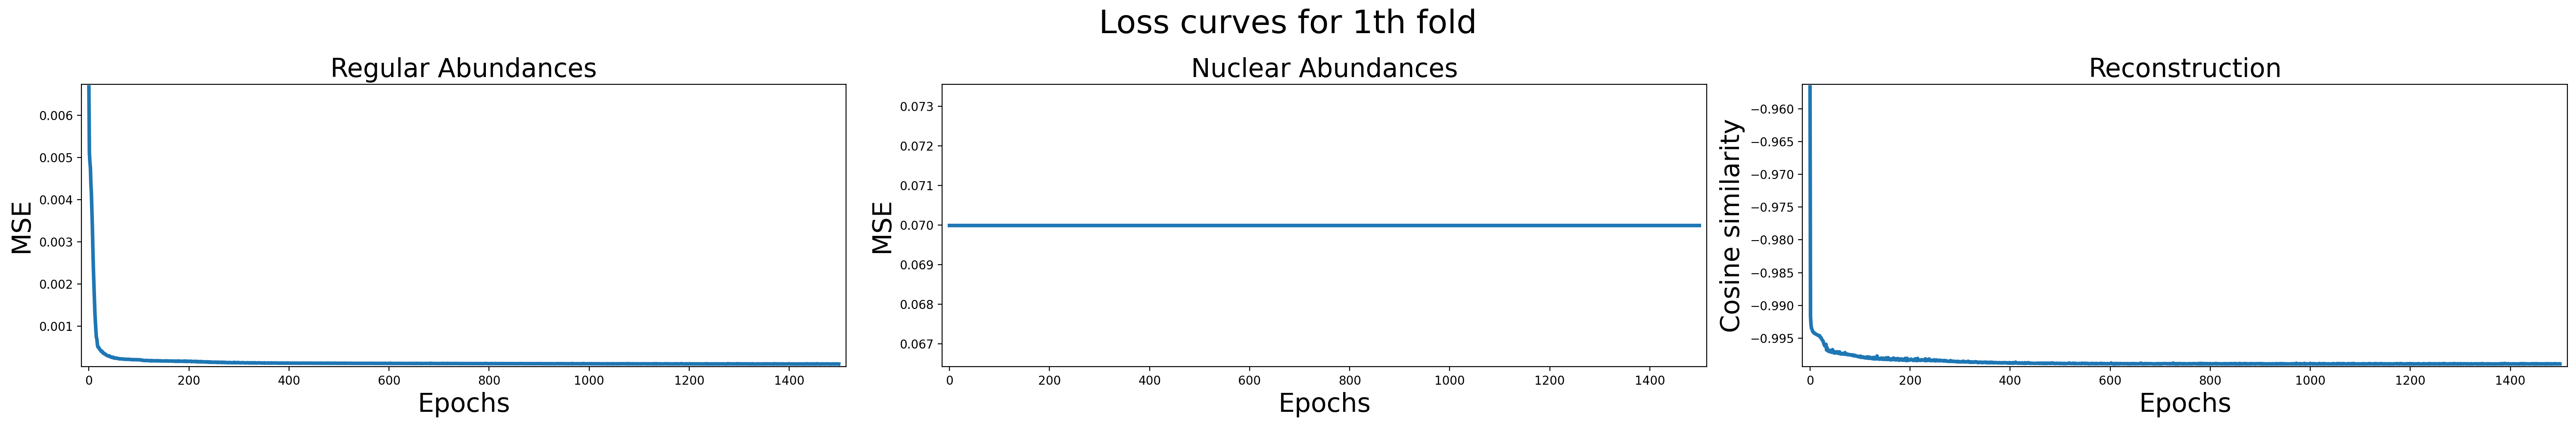

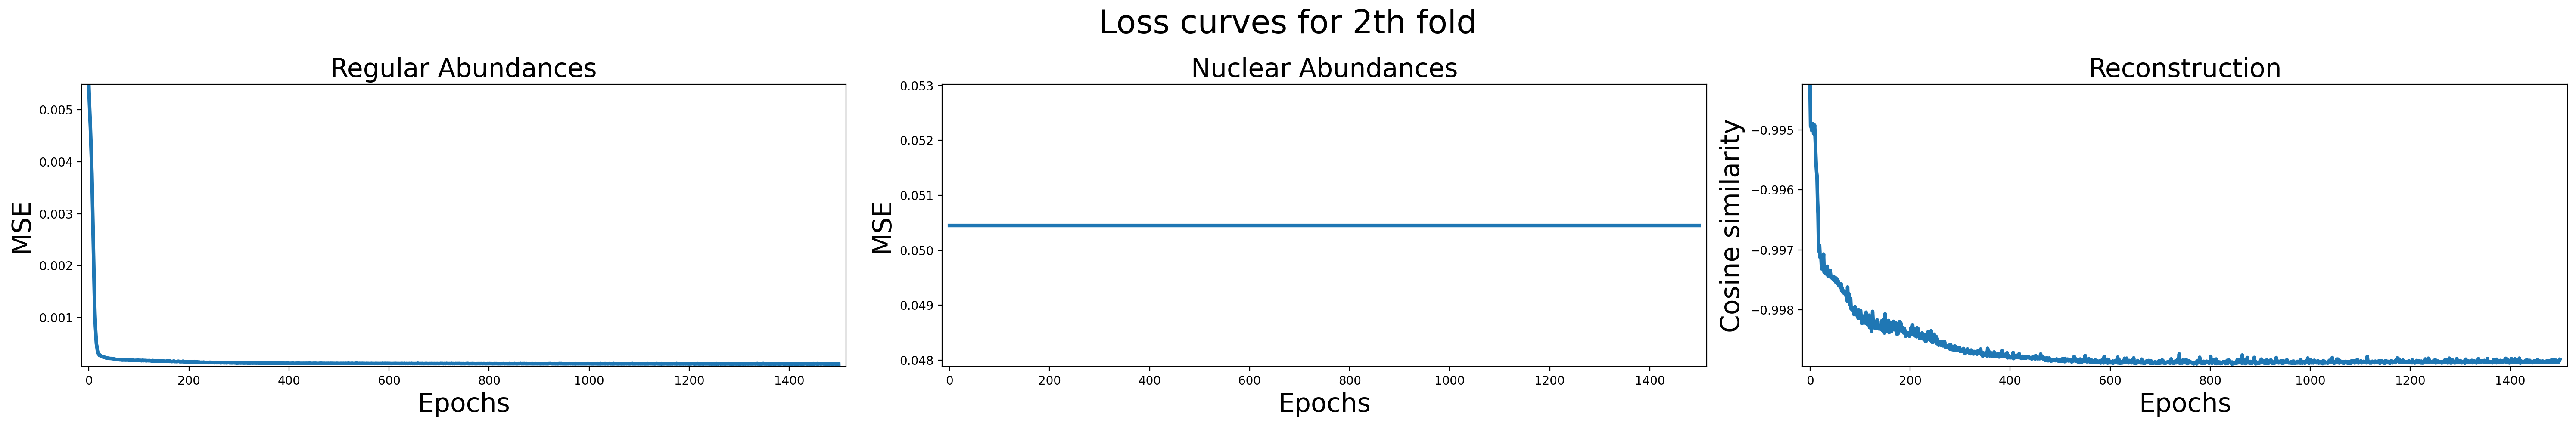

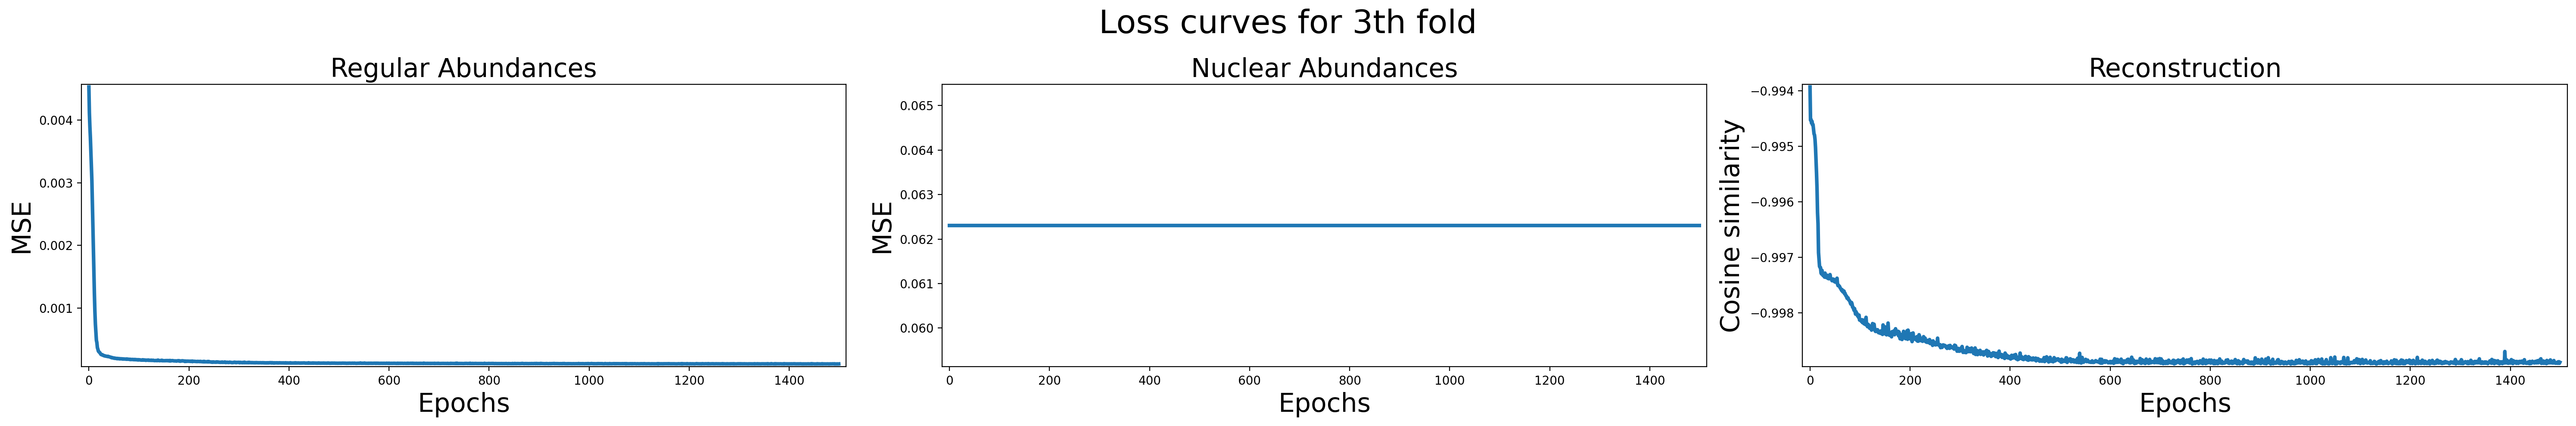

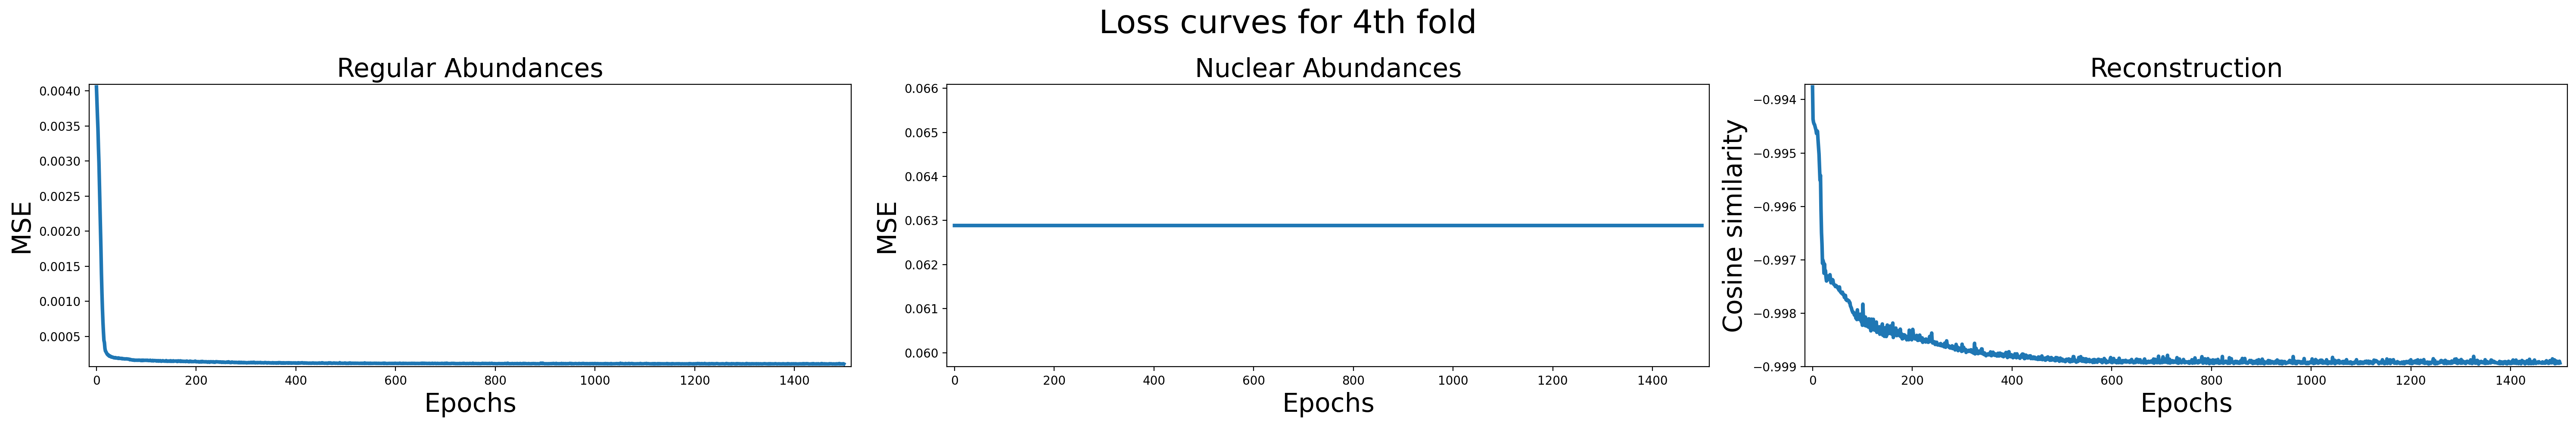

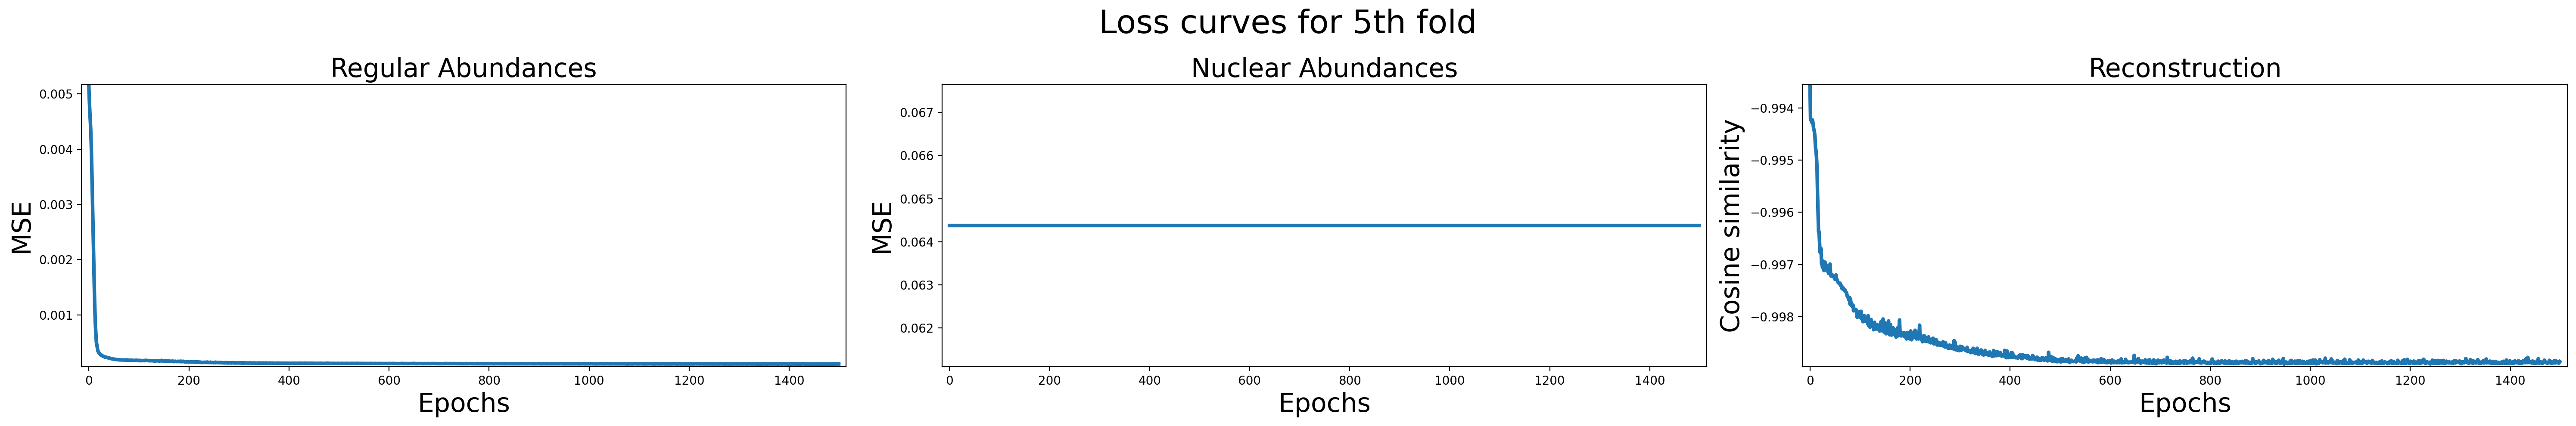

In [54]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #get the trained model for the current fold
    currentFoldModel=trainedModels[i]
    #get the current folds training history
    currenFoldTrainingHistory=modelTrainingHistories[i].history
    #get the validation losses
    regularAbundanceLoss=currenFoldTrainingHistory['val_tf.math.truediv_loss']
    nuclearAbundanceLoss=currenFoldTrainingHistory['val_tf.__operators__.add_loss']
    reconstructionLoss=currenFoldTrainingHistory['val_Reconstruced_Spectra_loss']
    #plot the loss curves
    #create a figure 
    figure,axes=plt.subplots(nrows=1,
                             ncols=3,
                             figsize=(30,5),
                             dpi=200)

    #plot the loss curve
    temp=axes[0].plot(regularAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[0].set_title("Regular Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[0].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[0].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[0].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[1].plot(nuclearAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[1].set_title("Nuclear Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[1].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[1].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[1].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[2].plot(reconstructionLoss,
                      lw=3)
    #set the title of the figure
    axes[2].set_title("Reconstruction",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[2].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[2].set_ylabel("Cosine similarity",fontsize=baseFontSize*1.2)
    #set the margin
    axes[2].margins(0.01)

    #add a title
    figure.suptitle(f"Loss curves for {i+1}th fold",
                    fontsize=baseFontSize*1.5)
    #adjust the layout
    plt.tight_layout()